## Imports

In [9]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [10]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [11]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 10
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 25)

## Start training

In [12]:
digits_nn.train(iter_limit=0, time_limit=3600 * 6, grad_check=True, info_print_frequency=2000, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 1.26s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 1.65s, J_train(θ): 8.546662772191787, J_cv(θ): 4.733445316596862, test set accuracy: 20.20%
Iter: 2000, duration: 618.55s, J_train(θ): 0.4160594482421875, J_cv(θ): 1.9476784677625498, test set accuracy: 90.40%
Iter: 4000, duration: 1229.81s, J_train(θ): 0.39860017903645834, J_cv(θ): 1.9999594743419005, test set accuracy: 90.10%
Iter: 6000, duration: 1836.94s, J_train(θ): 0.39222465006510415, J_cv(θ): 2.026940863336786, test set accuracy: 90.20%
Iter: 8000, duration: 2445.51s, J_train(θ): 0.3884137776692708, J_cv(θ): 2.041803163972325, test set accuracy: 90.20%
Iter: 10000, duration: 3053.03s, J_train(θ): 0.38584098307291664, J_cv(θ): 2.0492862237530907, test set accuracy: 90.10%
Iter: 12000, duration: 3666.05s, J_train(θ): 0.38389949544270835, J_cv(θ): 2.0574097272193086, 

## Print an example of prediction.

In [13]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
 8  3  2  2  3  1  6  3  3  8 10  2 10  3  7  6  6  1  6  3 
Prediction:
 8  3  2  2  8  1  6  3  3  2 10  2 10  3  9  6  6  1  6  3 

## Plot cost and accuracy graph.

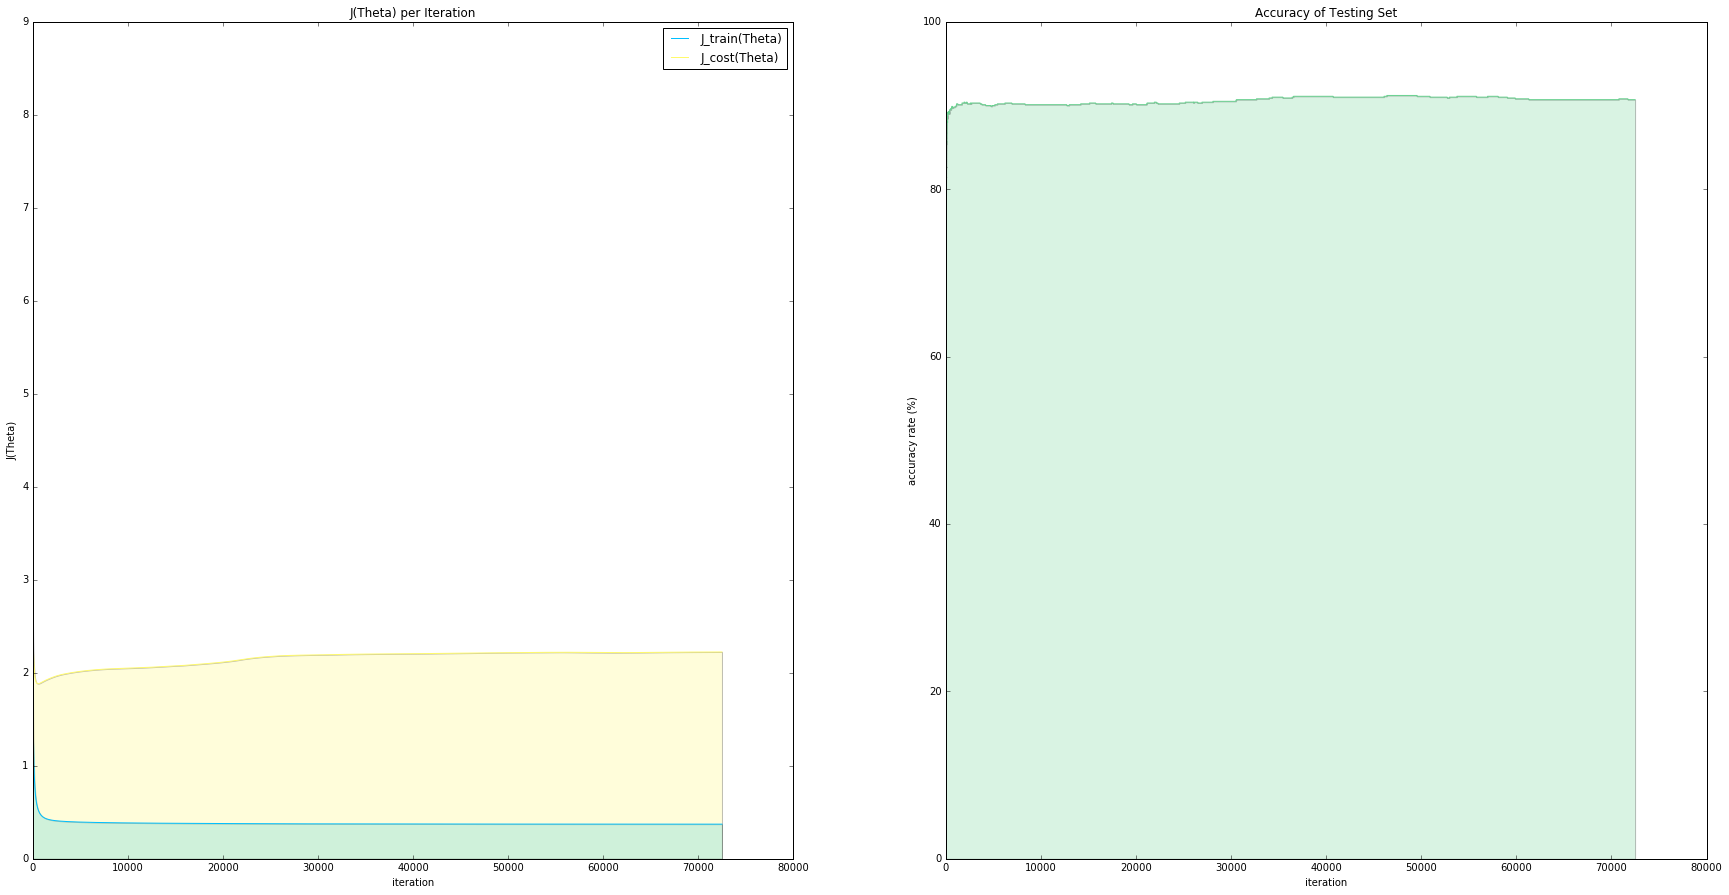

In [14]:
digits_nn.plot_training_info()
digits_nn.show_plot()

## Visualize Theta

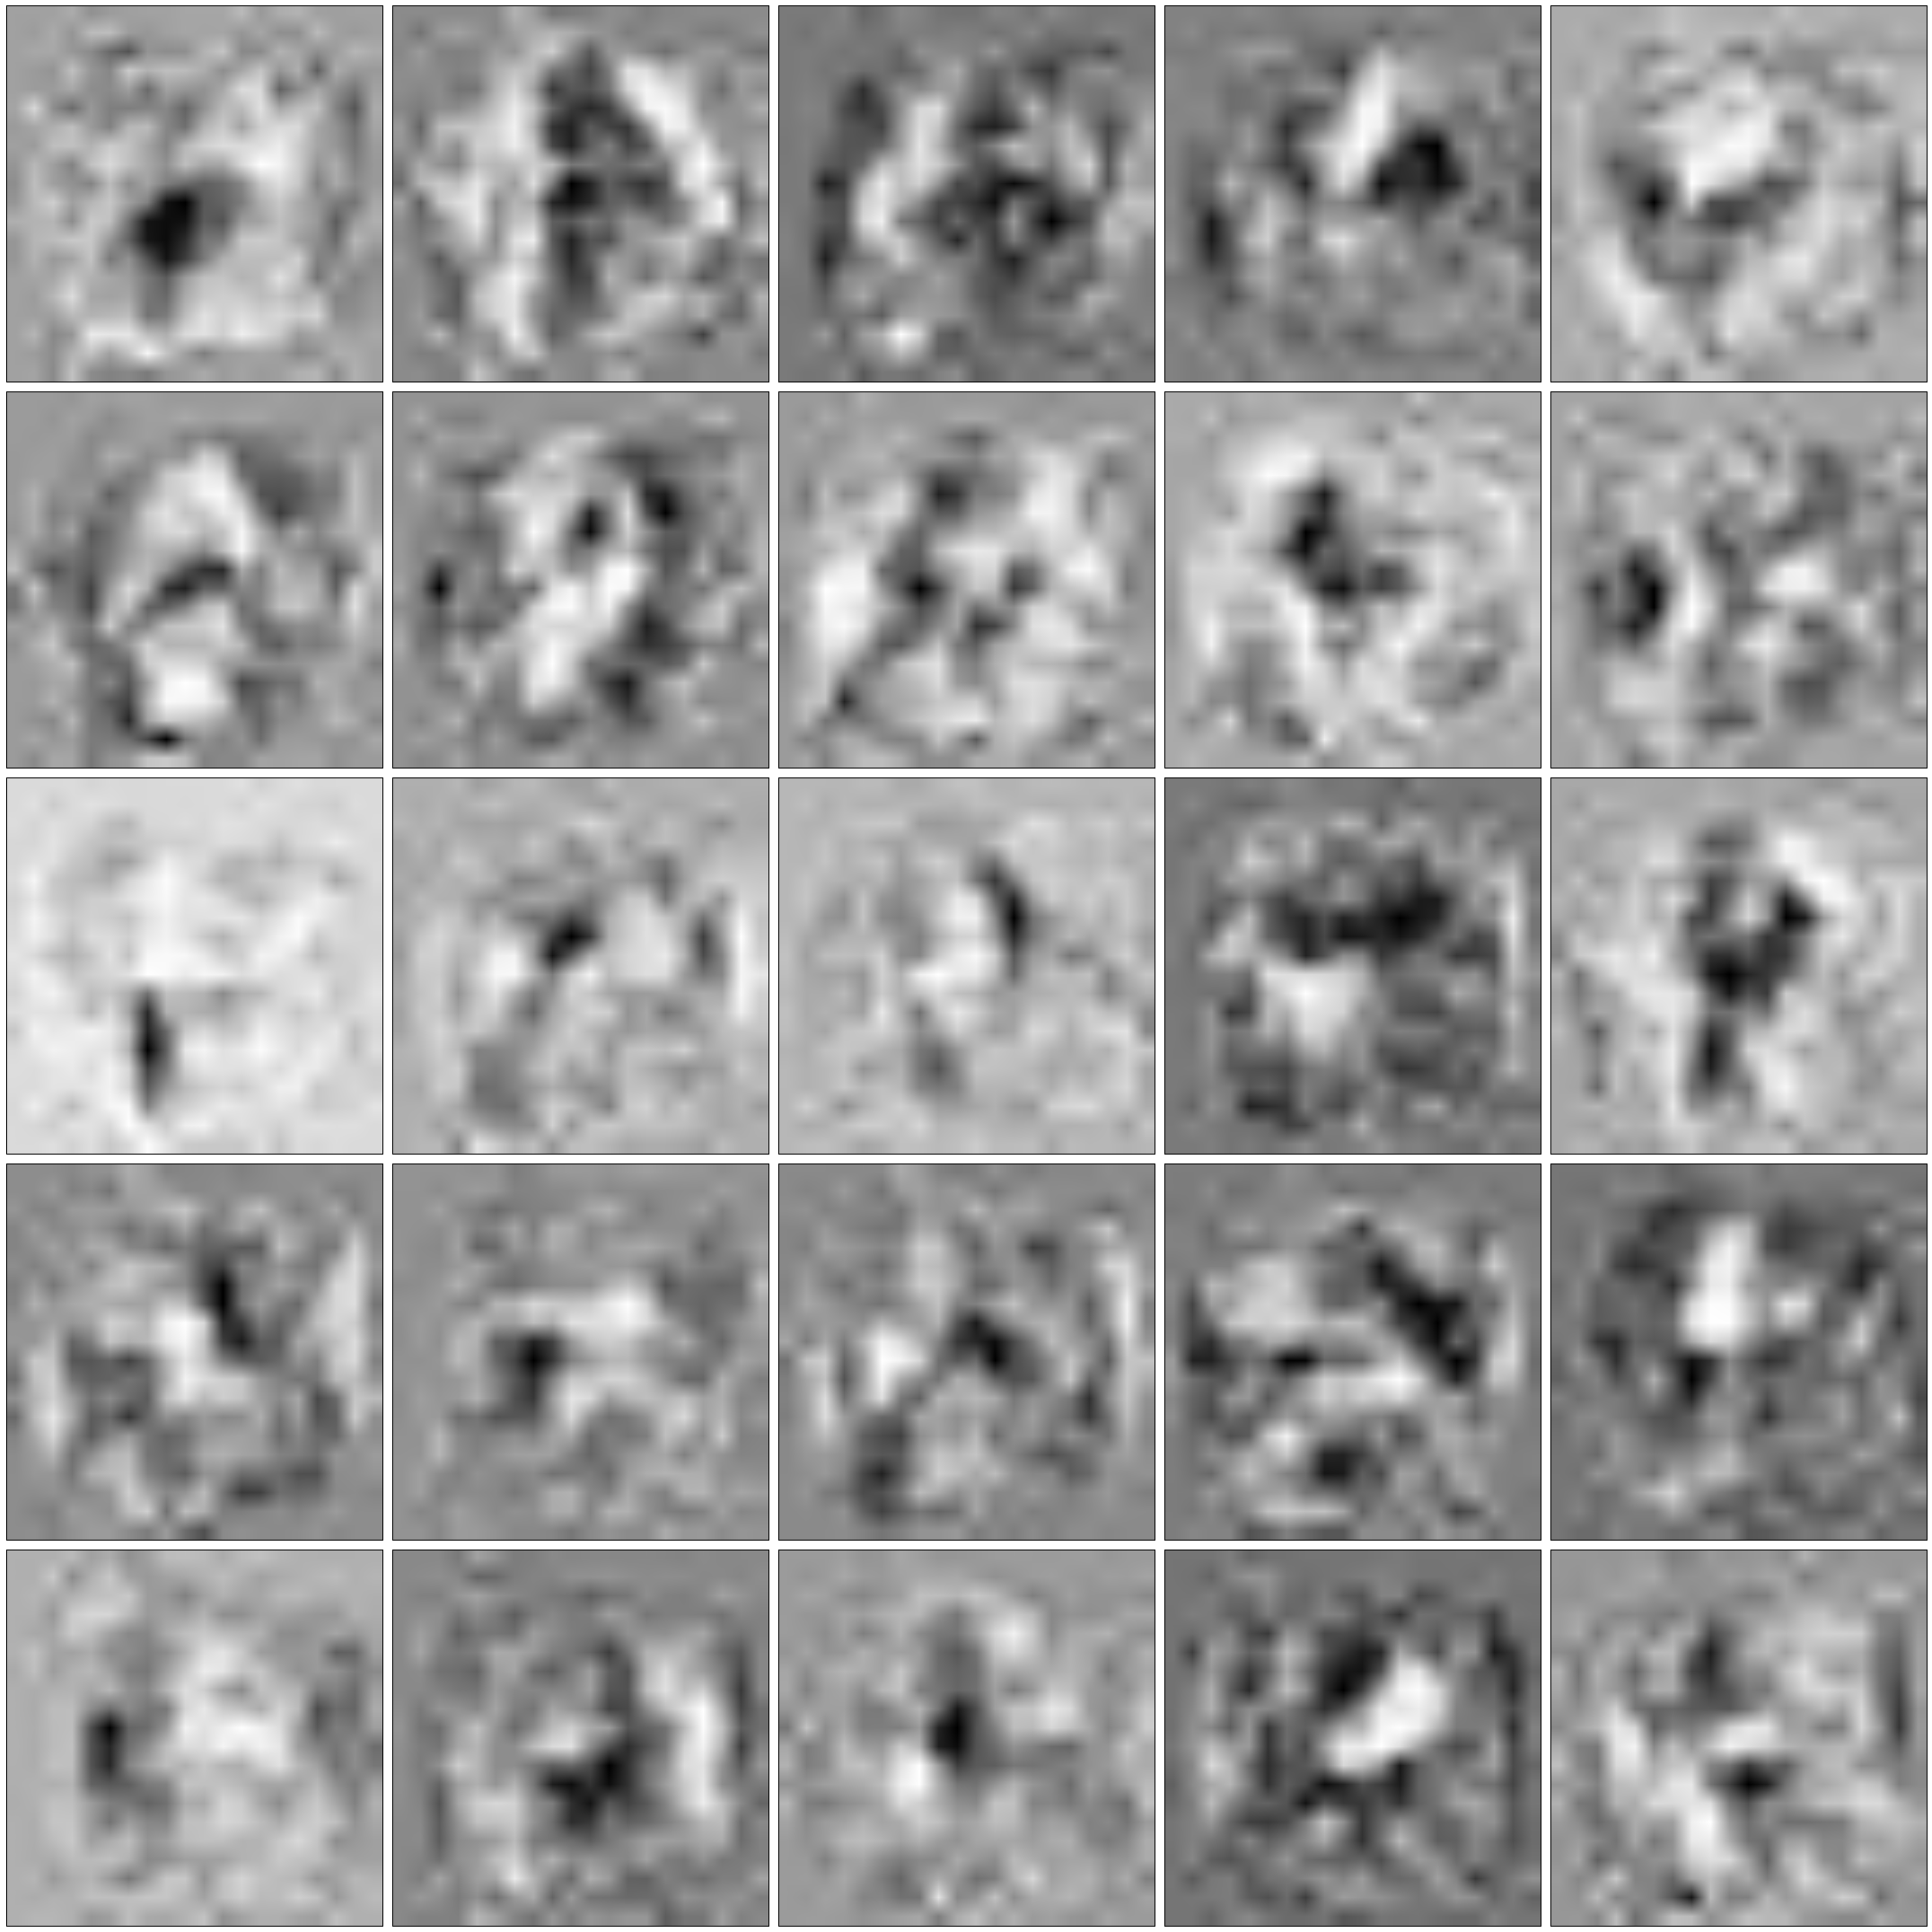

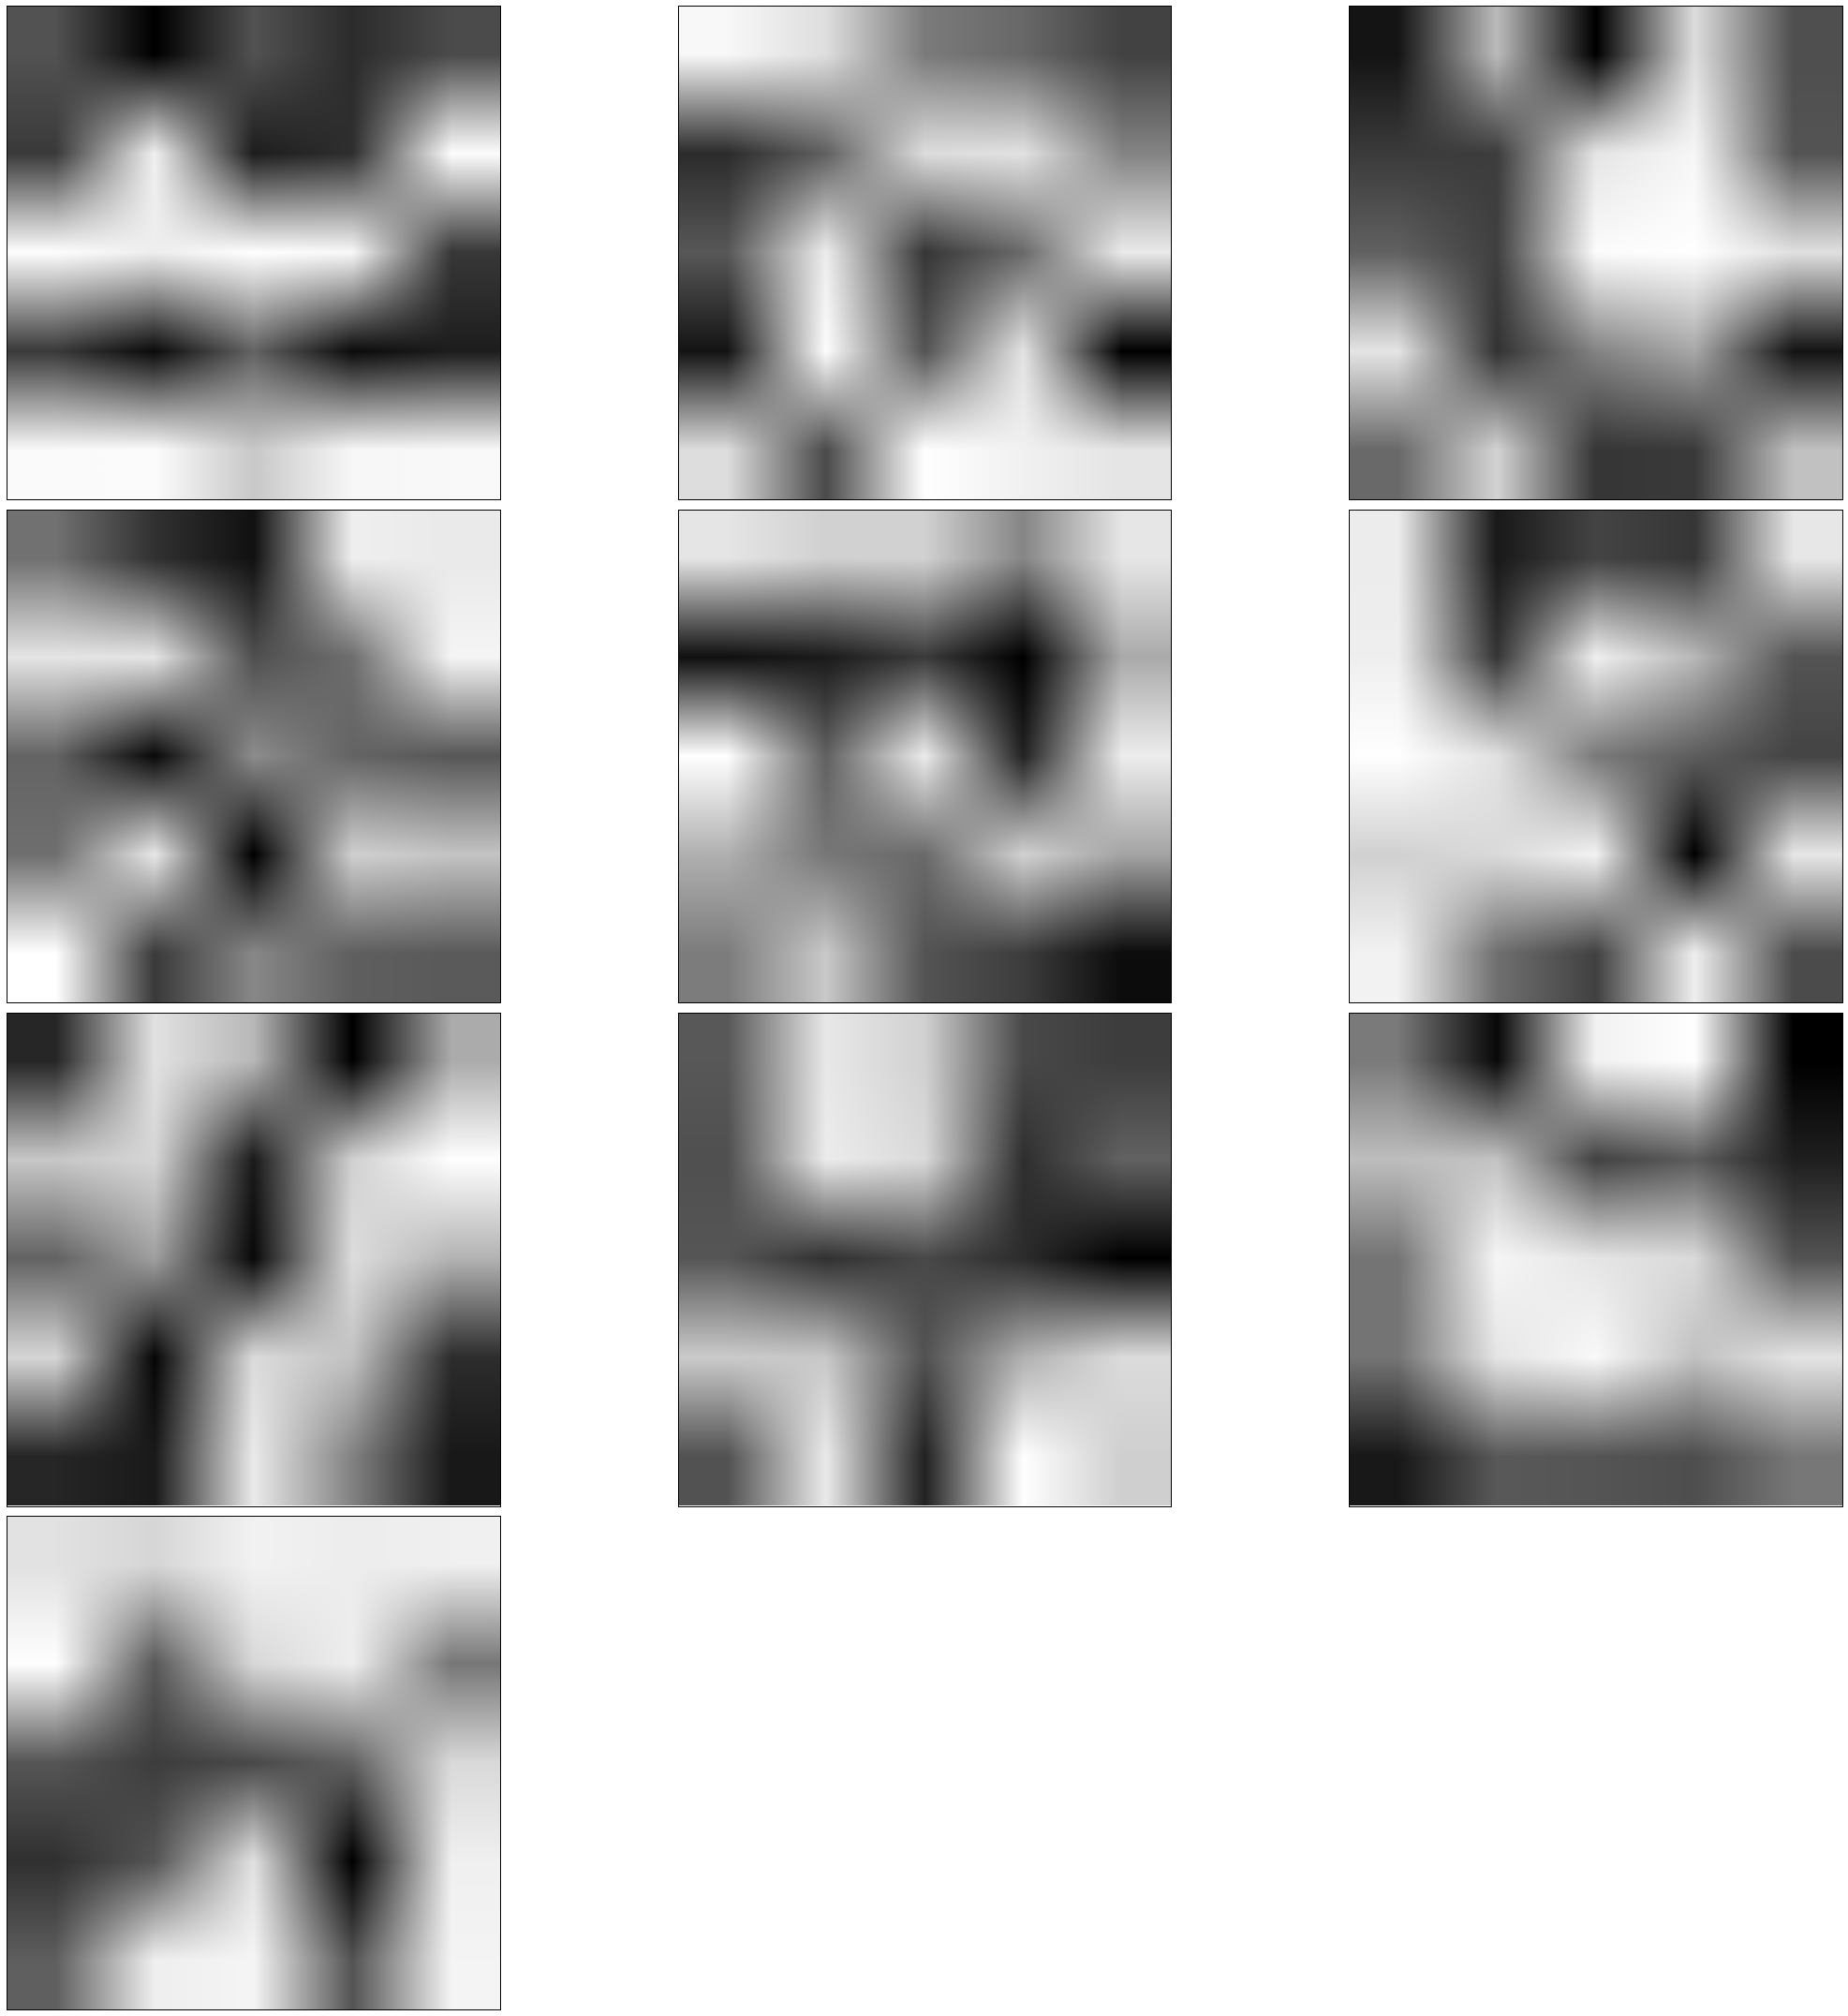

In [15]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()